In [1]:
import json
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from itertools import combinations
import pandas as pd
import numpy as np
import seaborn as sns

/opt/homebrew/Caskroom/miniconda/base/envs/ee/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
data_file = {
    'source': '../data/TH_samples_100.json',
    'gemini': '../outputs/gemini_2_5_TH_samples_100_few_shot.jsonl',
    'qwen': '../outputs/qwen2_5_TH_100_samples_few_shot.jsonl',
    'deepseek': '../outputs/deepseekr1_TH_100_samples_few_shot.jsonl',
    'typhoon': '../outputs/typhoon_TH_100_samples_few_shot.jsonl',
}

In [3]:
with open(data_file['source'], 'r') as f:
    data = json.load(f)

data[:2]

[{'title': 'FSIS ลั่นขยายเวลาแสดงความเห็นการติดเชื้อจากห้องปฎิบัติการ',
  'site_name': 'ACFS Early warning',
  'text': 'FSIS ลั่นขยายเวลาแสดงความเห็นการติดเชื้อจากห้องปฎิบัติการ 4 พฤษภาคม 2561 สำนักงานความปลอดภัยอาหารและการตรวจสอบอาหารของUSDA’s ได้ขยายเวลาสำหรับการแสดงความคิดเห็นจากการยื่นคำร้องของ U.S. Cattlemen’s Association USCA ที่ได้ขอให้ FSIS ทั้งนี้จะไม่รวมคำร้องจากห้องปฎิบัติการเนื้อวัวและเนื้อหมู ซึ่งทาง USCA ได้เรียนรู้ว่าบริษัทชั้นนำต่างๆกำลังลงทุนอย่างหนักเพื่อสร้างสรรผลิตภัณฑ์ทางเลือกใหม่ ซึ่งอาจจะมีรูปร่างลักษณะและรสชาติคล้ายกับผลิตภัณฑ์ที่มาจากเนื้อวัว เนื้อวัวและเนื้อที่ได้จากการทดลองซึ่งเรียกว่าเนื้อสัตว์ชีวภาพ เนื้อสะอาด หรือเนื้อสัตว์ที่เพาะเลี้ยง ทั้งนี้กฎระเบียบของ FSIS ได้อนุญาตให้ผู้ที่สนใจแสดงความคิดเห็นในการยื่นคำร้องต่อหน่วยงานและมีการจัดให้แสดงความคิดเห็นลงบนเว็ปไซด์ FSIS ซึ่งผู้ที่สนใจสามารถยื่นคำร้องได้ภายใน60 วัน นับจากวันที่ส่งคำร้อง และต้องยื่นให้แล้วเสร็จภายในวันที่ 17 เมษายน 2561 แต่เนื่องด้วยคำร้องต่างๆได้สร้างความสนใจให้กับเจ้าหน้าที่เป็นอย่างมาก ทำใ

In [4]:
with open(data_file['gemini'], 'r') as f:
    gemini_data = [json.loads(line) for line in f]

with open(data_file['qwen'], 'r') as f:
    qwen_data = [json.loads(line) for line in f]

with open(data_file['deepseek'], 'r') as f:
    deepseek_data = [json.loads(line) for line in f]

with open(data_file['typhoon'], 'r') as f:
    typhoon_data = [json.loads(line) for line in f]

In [5]:
gemini_data[1]

{'title': '‘ชลน่าน’ เตรียมต่อเฟส 2 ‘บัตรปชช.ใบเดียวรักษาทุกที่’ สปสช.เปิดเว็บไซต์ ‘คลินิก-ร้านยา’ ร่วมโครงการ | Hfocus.org',
 'site_name': 'Hfocus.org',
 'text': "Sunday, 7 January 2024 1400 ‘ชลน่าน’ เตรียมต่อเฟส 2 ‘บัตรปชช.ใบเดียวรักษาทุกที่’ สปสช.เปิดเว็บไซต์ ‘คลินิกร้านยา’ ร่วมโครงการ “ชลน่าน” ลั่นหลังคิกออฟระยะที่ 1 ‘บัตรปชช.ใบเดียวรักษาทุกที่’ ต่อระยะที่ 2 มี.ค.นี้อีก 8 จังหวัด คาดสิ้นปี 67 ครบทั้งประเทศ ขณะที่ สปสช.ชี้ปชช.รับบริการเอกชนที่ร่วมลงทะเบียน 4 จ.นำร่องเฟสแรก มี “คลินิกร้านยา” ดูรายละเอียดที่เว็บไซต์ สปสช. หลังจาก นพ.ชลน่าน ศรีแก้ว รัฐมนตรีว่าการกระทรวงสาธารณสุขสธ. ประกาศความพร้อมเตรียมคิกออฟเปิดบริการ “บัตรประชาชนใบเดียวรักษาทุกที่” ทุกสังกัดนำร่อง 4 จังหวัด มีร้อยเอ็ด แพร่ เพชรบุรี และนราธิวาส โดยเวลา 17.00 น.วันนี้7 ม.ค. นายเศรษฐา ทวีสิน นายกรัฐมนตรี เตรียมคิกออฟเปิดงานที่หน้าหอโหวด 101 จ.ร้อยเอ็ด พร้อมกันอีก 3 จังหวัดนำร่อง โดยมี น.ส.แพรทองธาร ชินวัตร หัวหน้าพรรคเพื่อไทย และรองประธานคณะกรรมการพัฒนาระบบสุขภาพแห่งชาติ นพ.พรหมินทร์ เลิศสุริย์เดช เลขาธิการนายกรัฐมนตรี แ

In [6]:
def data_transform(data):
    transformed_data = []
    for item in data:
        if not item['events']:
            continue
        
        for event in item['events']:
            for d in item['events'][event]:
                temp_data = {
                    'article_id': item['id'],
                    'type': event,
                    'trigger': d['trigger'],
                    'arguments': [
                        {
                            'role': k,
                            'text': v,
                        } for k, v in d['arguments'].items()
                    ]  
                }
                transformed_data.append(temp_data)
                
    return transformed_data

In [7]:
t_gemini = data_transform(gemini_data)
t_qwen = data_transform(qwen_data)
t_deepseek = data_transform(deepseek_data)
t_typhoon = data_transform(typhoon_data)

In [8]:
len(t_gemini), len(t_deepseek), len(t_qwen), len(t_typhoon)

(554, 321, 290, 157)

In [9]:
model_outputs = {
    'gemini': t_gemini,
    'qwen': t_qwen,
    'deepseek': t_deepseek,
    'typhoon': t_typhoon,
}

In [10]:
group_data = []

for sample in data:
    sample_id = sample['id']
    sample_group = {
        'id': sample_id,
        'text': sample['text'],
        'models': {
            'gemini': [],
            'qwen': [],
            'deepseek': [],
            'typhoon': []
        }
    }
    
    for model in model_outputs:
        for output in model_outputs[model]:
            if output['article_id'] == sample_id:
                sample_group['models'][model].append({
                    'type': output['type'],
                    'trigger': output['trigger'],
                    'arguments': output['arguments']
                })
    group_data.append(sample_group)

In [11]:
group_data[:2]

[{'id': '73d0a9f9-5461-4be3-b91c-75806b923766',
  'text': 'FSIS ลั่นขยายเวลาแสดงความเห็นการติดเชื้อจากห้องปฎิบัติการ 4 พฤษภาคม 2561 สำนักงานความปลอดภัยอาหารและการตรวจสอบอาหารของUSDA’s ได้ขยายเวลาสำหรับการแสดงความคิดเห็นจากการยื่นคำร้องของ U.S. Cattlemen’s Association USCA ที่ได้ขอให้ FSIS ทั้งนี้จะไม่รวมคำร้องจากห้องปฎิบัติการเนื้อวัวและเนื้อหมู ซึ่งทาง USCA ได้เรียนรู้ว่าบริษัทชั้นนำต่างๆกำลังลงทุนอย่างหนักเพื่อสร้างสรรผลิตภัณฑ์ทางเลือกใหม่ ซึ่งอาจจะมีรูปร่างลักษณะและรสชาติคล้ายกับผลิตภัณฑ์ที่มาจากเนื้อวัว เนื้อวัวและเนื้อที่ได้จากการทดลองซึ่งเรียกว่าเนื้อสัตว์ชีวภาพ เนื้อสะอาด หรือเนื้อสัตว์ที่เพาะเลี้ยง ทั้งนี้กฎระเบียบของ FSIS ได้อนุญาตให้ผู้ที่สนใจแสดงความคิดเห็นในการยื่นคำร้องต่อหน่วยงานและมีการจัดให้แสดงความคิดเห็นลงบนเว็ปไซด์ FSIS ซึ่งผู้ที่สนใจสามารถยื่นคำร้องได้ภายใน60 วัน นับจากวันที่ส่งคำร้อง และต้องยื่นให้แล้วเสร็จภายในวันที่ 17 เมษายน 2561 แต่เนื่องด้วยคำร้องต่างๆได้สร้างความสนใจให้กับเจ้าหน้าที่เป็นอย่างมาก ทำให้ทาง FSIS ต้องขยายระยะเวลาจนถึงวันที่ 17 พฤษภาคม 2561',
  'm

## 1. Event Count Analysis

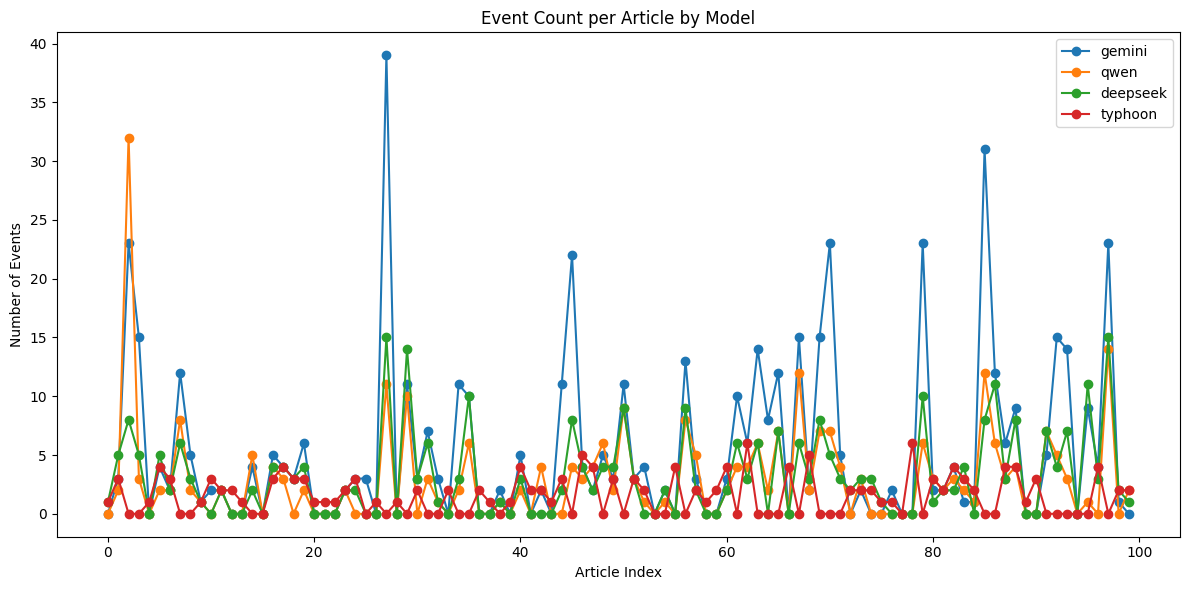

In [13]:
# Count number of events per model
event_counts = defaultdict(list)
article_ids = []

for article in group_data:
    article_ids.append(article['id'])
    for model_name, events in article['models'].items():
        event_counts[model_name].append(len(events))

# Plotting
plt.figure(figsize=(12, 6))
for model_name, counts in event_counts.items():
    plt.plot(counts, label=model_name, marker='o')

plt.title("Event Count per Article by Model")
plt.legend()
plt.xlabel("Article Index")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()

**Note**: Typhoon couldn't handle long context text that most of its response is implete. Based on observation, most of the time it cannot extract the article that has more than 5 events.

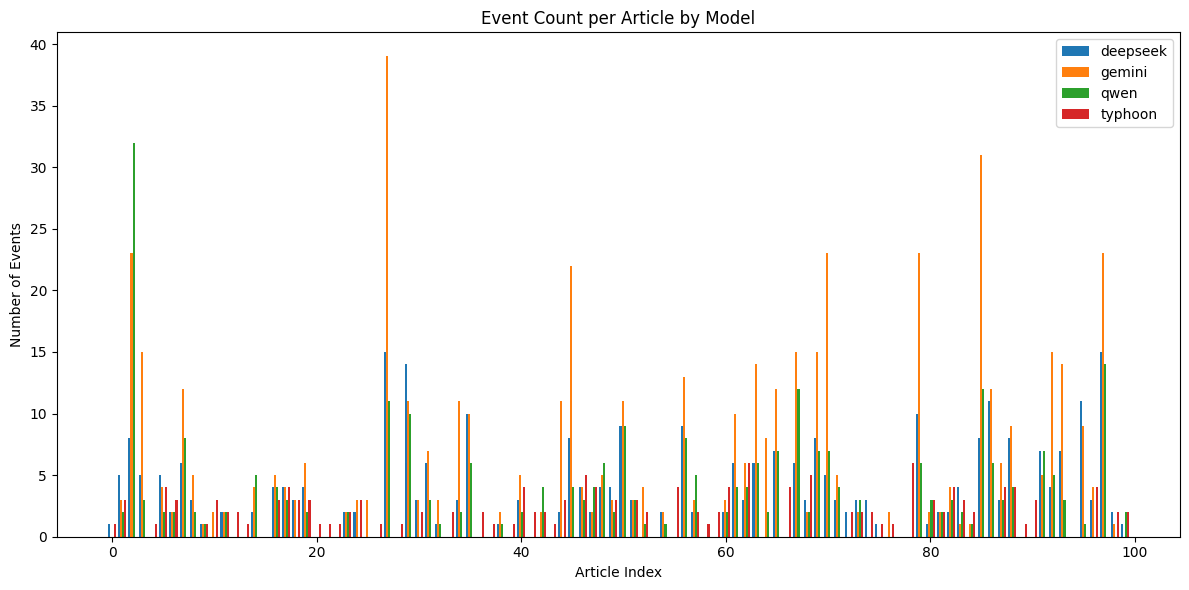

In [14]:
# Prepare data
models = sorted(event_counts.keys())
n_articles = len(article_ids)
x = np.arange(n_articles)  # the label locations
bar_width = 0.35 if len(models) == 2 else 0.8 / len(models)

# Plot bars for each model
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    offset = (i - len(models) / 2) * bar_width + bar_width / 2
    plt.bar(x + offset, event_counts[model], width=bar_width, label=model)

# Set labels and title
plt.xlabel("Article Index")
plt.ylabel("Number of Events")
plt.title("Event Count per Article by Model")
# plt.xticks(x, article_ids, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## 2. Event Type Distribution

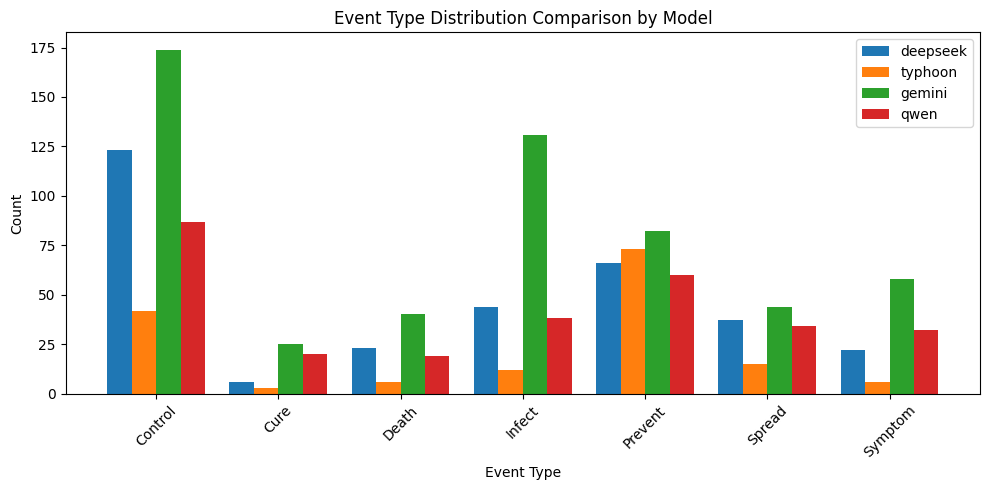

In [24]:
# Count event types per model
type_distribution = defaultdict(Counter)

for article in group_data:
    for model_name, events in article['models'].items():
        for event in events:
            event_type = event['type']
            type_distribution[model_name][event_type] += 1

models = list(type_distribution.keys())
event_types = set()
for model in models:
    event_types.update(type_distribution[model].keys())

event_types = sorted(event_types)

# Prepare data for plotting
model_counts = {model: [type_distribution[model].get(event_type, 0) for event_type in event_types] for model in models}

# Plotting
plt.figure(figsize=(10, 5))
bar_width = 0.2
x = range(len(event_types))

for i, model in enumerate(models):
    plt.bar([p + i * bar_width for p in x], model_counts[model], bar_width, label=model)

plt.title("Event Type Distribution Comparison by Model")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks([p + bar_width * 1.5 for p in x], event_types, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 3. Trigger Words

In [26]:
triger_words = {
    'gemini': defaultdict(list),
    'qwen': defaultdict(list),
    'deepseek': defaultdict(list),
    'typhoon': defaultdict(list),
}

for d in group_data:
    for model_name, events in d['models'].items():
        for event in events:
            triger_words[model_name][event['type']].append(event['trigger'])

In [27]:
def compare_trigger_overlap_by_type(triger_words, threshold=80):
    models = list(triger_words.keys())
    types = set()

    for m in models:
        types.update(triger_words[m].keys())

    overlap_matrix = defaultdict(dict)

    for t in types:
        for i, m1 in enumerate(models):
            for m2 in models[i:]:
                t1 = triger_words[m1].get(t, [])
                t2 = triger_words[m2].get(t, [])
                if not t1 or not t2:
                    overlap = 0
                else:
                    match_count = 0
                    for trig1 in t1:
                        for trig2 in t2:
                            if fuzz.token_set_ratio(trig1, trig2) >= threshold:
                                match_count += 1
                                break
                    overlap = match_count / len(t1)  # normalize by model 1's count
                overlap_matrix[(m1, m2)][t] = round(overlap, 2)
                if m1 != m2:
                    overlap_matrix[(m2, m1)][t] = round(match_count / len(t2), 2) if t2 else 0.0

    return overlap_matrix

overlap_matrix = compare_trigger_overlap_by_type(triger_words, threshold=80)

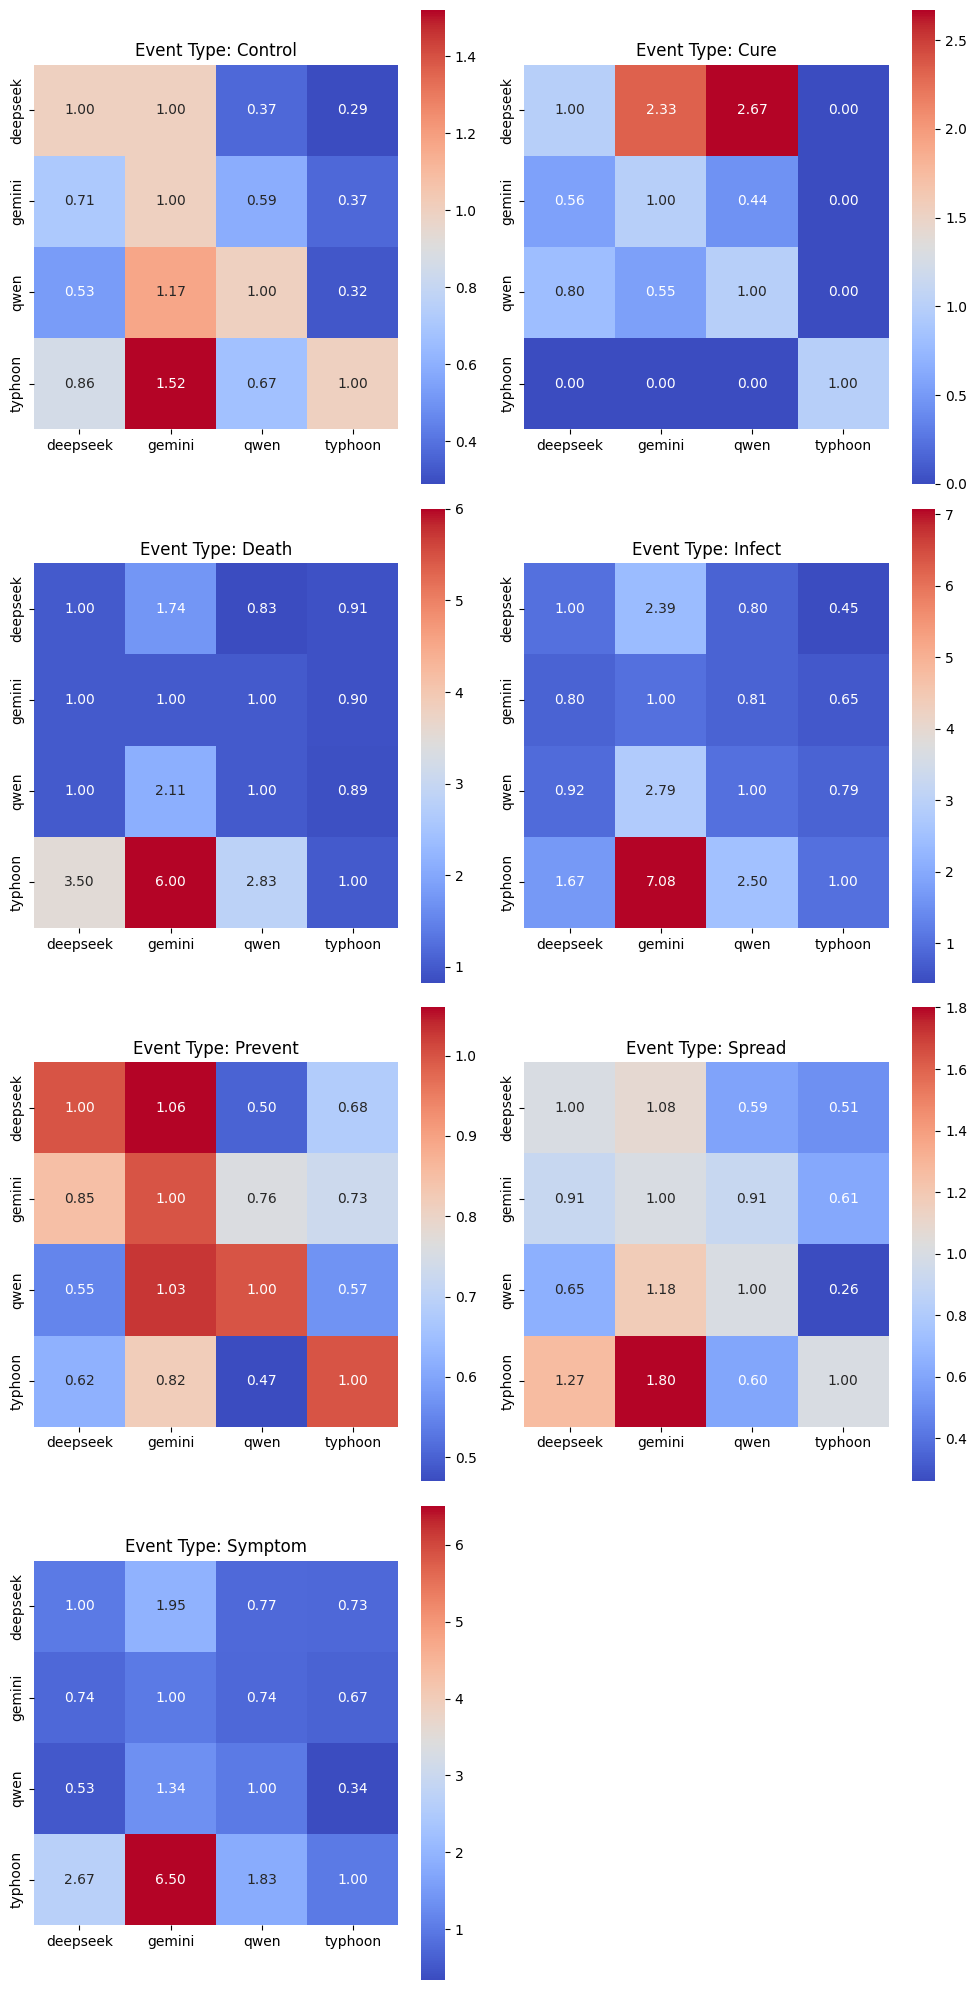

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

def plot_overlap_heatmaps_grid(overlap_matrix):
    event_types = set()
    models = set()

    # Collect all event types and models
    for (m1, m2), type_scores in overlap_matrix.items():
        event_types.update(type_scores.keys())
        models.update([m1, m2])

    event_types = sorted(event_types)
    models = sorted(models)
    num_types = len(event_types)

    # Determine grid size
    cols = 2 
    rows = math.ceil(num_types / cols)

    # Setup subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()

    for idx, t in enumerate(event_types):
        data = []
        for m1 in models:
            row = []
            for m2 in models:
                val = overlap_matrix.get((m1, m2), {}).get(t, 0)
                row.append(val)
            data.append(row)

        df = pd.DataFrame(data, index=models, columns=models)
        sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=axes[idx])
        axes[idx].set_title(f"Event Type: {t}")

    # Turn off extra subplots
    for i in range(len(event_types), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


plot_overlap_heatmaps_grid(overlap_matrix)

In [29]:
for model_name in triger_words:
    print(model_name)
    for m, events in triger_words[model_name].items():
        print(f"{m} has {len(set(events))} triggers: {set(events)}")
    print("-"*50)

gemini
Control has 83 triggers: {'จับกุม', 'บรรจุ', 'ควบคุม', 'สวมหน้ากากอนามัย', 'ตรวจกรอง', 'จัดส่ง', 'มอนิเตอร์', 'กักตัว', 'ปกป้อง', 'ตรวจเข้ม', 'แนะนำ', 'ต่อ', 'เลื่อน', 'ทำงาน', 'สอบสวน', 'มาตรการ', 'ความปลอดภัย', 'บูรณาการ', 'กักกัน', 'ตรวจสอบ', 'แก้ไข', 'สำรอง', 'ประสานงาน', 'block', 'จัดตั้ง', 'ลดลง', 'คัดกรอง', 'ห้าม', 'ติดตาม', 'จำกัด', 'เว้นระยะ', 'จับ', 'ปลอดภัย', 'บังคับใช้', 'ตรวจ', 'พัฒนาระบบ', 'ควบคุมโรค', 'ใช้ยา', 'ข้อจำกัด', 'สุ่มตรวจ', 'ช่วยเหลือ', 'มอบหมาย', 'แก้ปัญหา', 'เรียกคืน', 'กำชับ', 'รายงาน', 'จัดหา', 'ดูแล', 'วางแผน', 'พัฒนา', 'เดินหน้า', 'กด', 'คุมเข้ม', 'ออกมาตรการ', 'กำหนด', 'เฝ้าติดตาม', 'ป้องกัน', 'งด', 'เตรียมความพร้อม', 'ล้างมือ', 'report', 'สนับสนุน', 'สู้', 'ซักซ้อม', 'ส่งมอบ', 'มาตรการปิด', 'เฝ้าระวัง', 'ส่ง', 'ห้ามใช้', 'รักษา', 'ล็อกดาวน์', 'พก', 'สั่งปิด', 'ปลอด', 'เตือนภัย', 'เตือน', 'คุมโรค', 'สอบสวนโรค', 'ลด', 'เปิด', 'ดำเนินการ', 'กำจัด', 'แจ้ง'}
Symptom has 22 triggers: {'ท้อแท้', 'กังวล', 'อาการป่วย', 'มีผื่นขึ้น', 'อารมณ์', 'มีอาการ', '

## 4. Argument Role Comparison

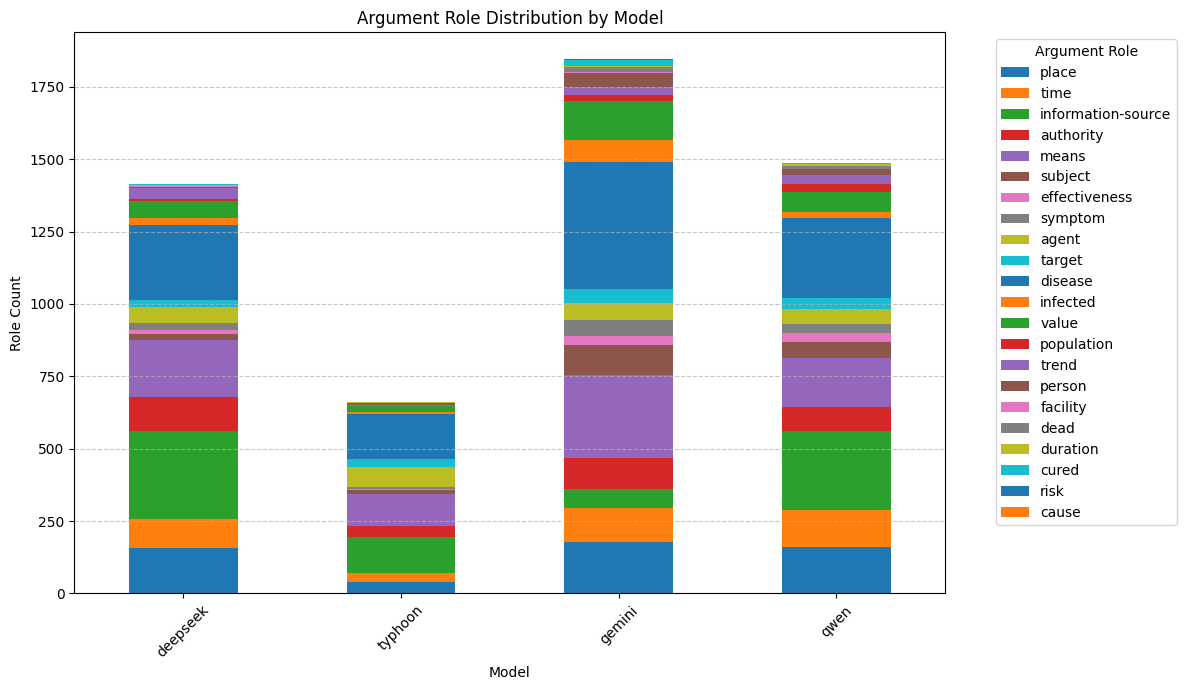

In [30]:
# Count roles per model
role_counts = defaultdict(Counter)

for article in group_data:  # assuming your list is named `group_data`
    for model_name, events in article['models'].items():
        for event in events:
            for arg in event.get('arguments', []):
                role_counts[model_name][arg['role']] += 1

# Convert to DataFrame
df = pd.DataFrame(role_counts).fillna(0).astype(int)

# Transpose for plotting (optional, depending on layout)
df = df.T  # rows = models, columns = roles

# Plotting
ax = df.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title("Argument Role Distribution by Model")
plt.xlabel("Model")
plt.ylabel("Role Count")
plt.legend(title="Argument Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**NOTED**: There are 3 arguments role came out from nowhere from the model outputs: `person`, `risk`, and `cause`. `information-source` has 2 diffent forms as well.

In [31]:
# Inspect abnormal argument roles
gemini_event_roles = defaultdict(list)
for article in group_data:
    for event in article['models']['gemini']:
        for arg in event.get('arguments', []):
            gemini_event_roles[event['type']].append(arg['role'])

# Print out the roles for each event type in Gemini
for event_type, roles in gemini_event_roles.items():
    unique_roles = set(roles)
    print(f"Event Type: {event_type},\nUnique Roles: {unique_roles},\nCount: {len(unique_roles)}")
    print("-" * 50)
    

Event Type: Control,
Unique Roles: {'place', 'information-source', 'authority', 'target', 'duration', 'effectiveness', 'value', 'agent', 'disease', 'subject', 'means', 'time'},
Count: 12
--------------------------------------------------
Event Type: Symptom,
Unique Roles: {'place', 'symptom', 'information-source', 'person', 'value', 'effectiveness', 'disease', 'means', 'time', 'infected'},
Count: 10
--------------------------------------------------
Event Type: Cure,
Unique Roles: {'information-source', 'disease', 'facility', 'agent', 'value', 'effectiveness', 'means', 'cured'},
Count: 8
--------------------------------------------------
Event Type: Prevent,
Unique Roles: {'place', 'information-source', 'authority', 'target', 'agent', 'effectiveness', 'time', 'value', 'disease', 'means'},
Count: 10
--------------------------------------------------
Event Type: Death,
Unique Roles: {'place', 'cause', 'symptom', 'information-source', 'trend', 'value', 'dead', 'disease', 'means', 'time', 

In [32]:
# Inspect abnormal argument roles
qwen_event_roles = defaultdict(list)
for article in group_data:
    for event in article['models']['qwen']:
        for arg in event.get('arguments', []):
            qwen_event_roles[event['type']].append(arg['role'])

for event_type, roles in qwen_event_roles.items():
    unique_roles = set(roles)
    print(f"Event Type: {event_type},\nUnique Roles: {unique_roles},\nCount: {len(unique_roles)}")
    print("-" * 50)

Event Type: Prevent,
Unique Roles: {'information-source', 'target', 'agent', 'effectiveness', 'time', 'disease', 'means'},
Count: 7
--------------------------------------------------
Event Type: Control,
Unique Roles: {'place', 'information-source', 'authority', 'target', 'effectiveness', 'time', 'disease', 'subject', 'means'},
Count: 9
--------------------------------------------------
Event Type: Symptom,
Unique Roles: {'place', 'symptom', 'information-source', 'person', 'duration', 'disease', 'time'},
Count: 7
--------------------------------------------------
Event Type: Cure,
Unique Roles: {'place', 'information-source', 'disease', 'facility', 'duration', 'value', 'time', 'effectiveness', 'means', 'cured'},
Count: 10
--------------------------------------------------
Event Type: Spread,
Unique Roles: {'place', 'population', 'information-source', 'trend', 'value', 'disease', 'time'},
Count: 7
--------------------------------------------------
Event Type: Infect,
Unique Roles: {'pla

In [33]:
# Inspect abnormal argument roles
deepseek_event_roles = defaultdict(list)
for article in group_data:
    for event in article['models']['deepseek']:
        for arg in event.get('arguments', []):
            deepseek_event_roles[event['type']].append(arg['role'])

for event_type, roles in deepseek_event_roles.items():
    unique_roles = set(roles)
    print(f"Event Type: {event_type},\nUnique Roles: {unique_roles},\nCount: {len(unique_roles)}")
    print("-" * 50)

Event Type: Infect,
Unique Roles: {'place', 'information-source', 'value', 'disease', 'time', 'infected'},
Count: 6
--------------------------------------------------
Event Type: Control,
Unique Roles: {'place', 'information-source', 'authority', 'disease', 'target', 'facility', 'value', 'effectiveness', 'subject', 'means', 'time'},
Count: 11
--------------------------------------------------
Event Type: Symptom,
Unique Roles: {'place', 'symptom', 'information-source', 'person', 'value', 'time', 'disease', 'means'},
Count: 8
--------------------------------------------------
Event Type: Prevent,
Unique Roles: {'place', 'information-source', 'target', 'duration', 'agent', 'time', 'effectiveness', 'disease', 'means'},
Count: 9
--------------------------------------------------
Event Type: Cure,
Unique Roles: {'place', 'symptom', 'information-source', 'effectiveness', 'value', 'time', 'disease', 'means', 'cured'},
Count: 9
--------------------------------------------------
Event Type: Dea

In [34]:
# inspect abnormal argument roles
typhoon_event_roles = defaultdict(list)
for article in group_data:
    for event in article['models']['typhoon']:
        for arg in event.get('arguments', []):
            typhoon_event_roles[event['type']].append(arg['role'])
for event_type, roles in typhoon_event_roles.items():
    unique_roles = set(roles)
    print(f"Event Type: {event_type},\nUnique Roles: {unique_roles},\nCount: {len(unique_roles)}")
    print("-" * 50)

Event Type: Prevent,
Unique Roles: {'place', 'information-source', 'authority', 'target', 'agent', 'value', 'disease', 'subject', 'means'},
Count: 9
--------------------------------------------------
Event Type: Control,
Unique Roles: {'place', 'information-source', 'authority', 'effectiveness', 'disease', 'subject', 'means', 'time'},
Count: 8
--------------------------------------------------
Event Type: Spread,
Unique Roles: {'place', 'population', 'information-source', 'trend', 'value', 'disease', 'time'},
Count: 7
--------------------------------------------------
Event Type: Death,
Unique Roles: {'place', 'information-source', 'trend', 'value', 'disease', 'time'},
Count: 6
--------------------------------------------------
Event Type: Infect,
Unique Roles: {'place', 'symptom', 'information-source', 'person', 'value', 'disease', 'time', 'infected'},
Count: 8
--------------------------------------------------
Event Type: Cure,
Unique Roles: {'disease', 'facility', 'duration', 'effec

In [35]:
# {model: {event_type: set(argument_roles)}}
model_event_roles = defaultdict(lambda: defaultdict(set))

for article in group_data:
    for model_name, events in article['models'].items():
        for event in events:
            event_type = event['type']
            for arg in event.get('arguments', []):
                model_event_roles[model_name][event_type].add(arg['role'])

In [36]:
# Get all event types and model names
all_event_types = sorted({et for model in model_event_roles.values() for et in model})
all_models = sorted(model_event_roles.keys())

# Build table
data = []
for event_type in all_event_types:
    row = []
    for model in all_models:
        count = len(model_event_roles[model].get(event_type, set()))
        row.append(count)
    data.append(row)

# Create DataFrame
df_roles = pd.DataFrame(data, index=all_event_types, columns=all_models)

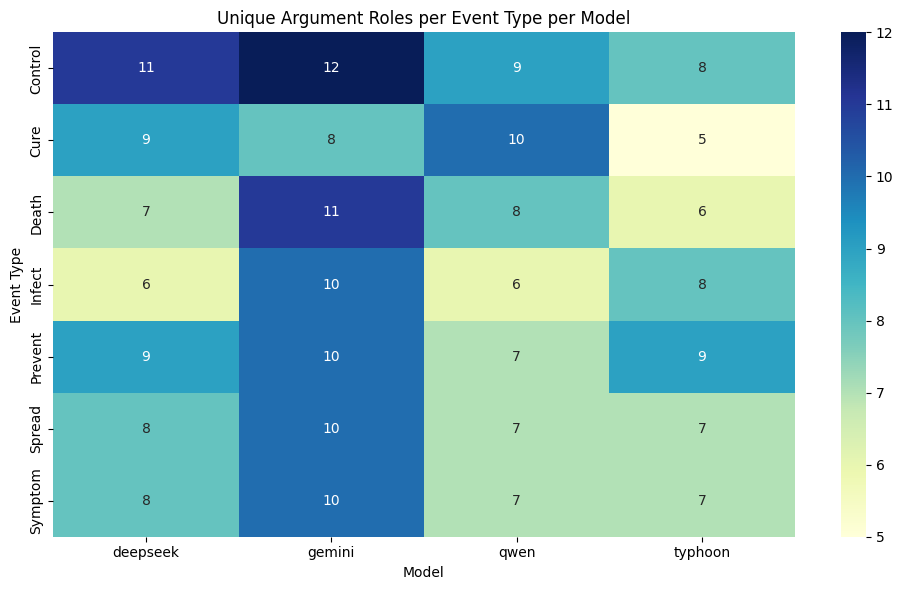

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_roles, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Unique Argument Roles per Event Type per Model")
plt.xlabel("Model")
plt.ylabel("Event Type")
plt.tight_layout()
plt.show()

Actual unique number of argument by event type:
- Control: 8
- Cure: 10
- Death: 7
- Infect: 6
- Prevent: 6
- Spread: 7
- Symptom: 7

In [40]:
# find model that contains `information_source`, `risk`, or `cause` role
for model_name, event_roles in model_event_roles.items():
    for event_type, roles in event_roles.items():
        if 'risk' in roles or 'cause' in roles:
            print(f"Model: {model_name}, Event Type: {event_type}, Roles: {roles}")

Model: gemini, Event Type: Death, Roles: {'place', 'cause', 'symptom', 'information-source', 'trend', 'value', 'dead', 'disease', 'means', 'time', 'infected'}
Model: gemini, Event Type: Infect, Roles: {'place', 'symptom', 'information-source', 'trend', 'value', 'risk', 'disease', 'means', 'time', 'infected'}


The arguments sometimes were add up by the model.